In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
races=pd.read_csv("D://F1/races.csv")

In [25]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


In [26]:
results=pd.read_csv("D://F1/results.csv")
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [27]:
#channging the name of circuits and removing columns

races['circuit_name']=races['name']
races.drop(['name','date','time','url'],axis=1,inplace=True)
races.head()


,raceId,year,round,circuitId,circuit_name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [29]:
new=pd.merge(races,results)
new.head()

,raceId,year,round,circuitId,circuit_name,resultId,driverId,constructorId,number,grid,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,2009,1,1,Australian Grand Prix,7554,18,23,22,1,...,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1
1,1,2009,1,1,Australian Grand Prix,7555,22,23,23,2,...,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1
2,1,2009,1,1,Australian Grand Prix,7556,15,7,9,20,...,3,6.0,58,+1.604,5657388,50,10,1:28.916,214.706,1
3,1,2009,1,1,Australian Grand Prix,7557,10,7,10,19,...,4,5.0,58,+4.435,5660219,53,6,1:28.416,215.920,1
4,1,2009,1,1,Australian Grand Prix,7558,4,4,7,10,...,5,4.0,58,+4.879,5660663,53,9,1:28.712,215.199,1


In [33]:
drivers=pd.read_csv("D://F1/drivers.csv")

drivers['driver_name']=drivers['surname']
drivers.drop(['driverRef','number','forename','dob','url'],axis=1,inplace=True)


,driverId,code,surname,nationality,driver_name
0,1,HAM,Hamilton,British,Hamilton
1,2,HEI,Heidfeld,German,Heidfeld
2,3,ROS,Rosberg,German,Rosberg
3,4,ALO,Alonso,Spanish,Alonso
4,5,KOV,Kovalainen,Finnish,Kovalainen


In [34]:
drivers.drop(['driver_name'],axis=1,inplace=True)
drivers.head()

,driverId,code,surname,nationality
0,1,HAM,Hamilton,British
1,2,HEI,Heidfeld,German
2,3,ROS,Rosberg,German
3,4,ALO,Alonso,Spanish
4,5,KOV,Kovalainen,Finnish


In [35]:
new1=pd.merge(drivers,new)
new1.head()

,driverId,code,surname,nationality,raceId,year,round,circuitId,circuit_name,resultId,...,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,HAM,Hamilton,British,1,2009,1,1,Australian Grand Prix,7573,...,20,0.0,58,\N,\N,39,13,1:29.020,214.455,2
1,1,HAM,Hamilton,British,2,2009,2,2,Malaysian Grand Prix,7580,...,7,1.0,31,+1:00.733,4312825,17,11,1:39.141,201.276,1
2,1,HAM,Hamilton,British,3,2009,3,17,Chinese Grand Prix,7599,...,6,3.0,56,+1:11.866,7135351,39,12,1:54.665,171.138,1
3,1,HAM,Hamilton,British,4,2009,4,3,Bahrain Grand Prix,7617,...,4,5.0,57,+22.096,5530278,13,6,1:34.915,205.269,1
4,1,HAM,Hamilton,British,5,2009,5,4,Spanish Grand Prix,7642,...,9,0.0,65,\N,\N,29,9,1:23.839,199.883,11


In [36]:
new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25140 entries, 0 to 25139
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   driverId         25140 non-null  int64  
 1   code             25140 non-null  object 
 2   surname          25140 non-null  object 
 3   nationality      25140 non-null  object 
 4   raceId           25140 non-null  int64  
 5   year             25140 non-null  int64  
 6   round            25140 non-null  int64  
 7   circuitId        25140 non-null  int64  
 8   circuit_name     25140 non-null  object 
 9   resultId         25140 non-null  int64  
 10  constructorId    25140 non-null  int64  
 11  number           25140 non-null  object 
 12  grid             25140 non-null  int64  
 13  position         25140 non-null  object 
 14  positionText     25140 non-null  object 
 15  positionOrder    25140 non-null  int64  
 16  points           25140 non-null  float64
 17  laps        

In [37]:
qualifying=pd.read_csv("D://F1/qualifying.csv")
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [38]:
status=pd.read_csv("D://F1/status.csv")
status.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [41]:
#merging status with new1

new2=pd.merge(status,new1)
new2.tail()

,statusId,status,driverId,code,surname,nationality,raceId,year,round,circuitId,...,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
25135,135,Brake duct,8,RAI,Räikkönen,Finnish,942,2015,16,69,...,R,16,0.0,25,\N,\N,24,14,1:46.186,186.905
25136,136,Seat,815,PER,Pérez,Mexican,976,2017,8,73,...,R,15,0.0,39,\N,\N,37,8,1:45.588,204.670
25137,137,Damage,817,RIC,Ricciardo,Australian,1010,2019,1,1,...,R,19,0.0,28,\N,\N,18,19,1:29.848,212.478
25138,138,Debris,847,RUS,Russell,British,1037,2020,7,13,...,R,19,0.0,9,\N,\N,5,18,1:51.754,225.624
25139,139,Illness,825,MAG,Magnussen,Danish,1043,2020,13,21,...,R,18,0.0,47,\N,\N,45,18,1:19.273,222.930


## Analyzing the 2009 F1 season

In [48]:
group=new2.groupby('year')
group.head()

,statusId,status,driverId,code,surname,nationality,raceId,year,round,circuitId,...,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,Finished,1,HAM,Hamilton,British,2,2009,2,2,...,7,7,1.0,31,+1:00.733,4312825,17,11,1:39.141,201.276
1,1,Finished,1,HAM,Hamilton,British,3,2009,3,17,...,6,6,3.0,56,+1:11.866,7135351,39,12,1:54.665,171.138
2,1,Finished,1,HAM,Hamilton,British,4,2009,4,3,...,4,4,5.0,57,+22.096,5530278,13,6,1:34.915,205.269
3,1,Finished,1,HAM,Hamilton,British,7,2009,7,5,...,13,13,0.0,58,+1:20.454,5265302,53,15,1:28.562,216.986
4,1,Finished,1,HAM,Hamilton,British,10,2009,10,11,...,1,1,10.0,70,1:38:23.876,5903876,16,4,1:22.479,191.219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5488,1,Finished,579,\N,Fangio,Argentine,834,1950,2,6,...,1,1,9.0,100,3:13:18.7,11598700,\N,\N,\N,\N
5489,1,Finished,579,\N,Fangio,Argentine,837,1950,5,13,...,1,1,8.0,35,2:47:26.0,10046000,\N,\N,\N,\N
5490,1,Finished,579,\N,Fangio,Argentine,838,1950,6,55,...,1,1,9.0,64,2:57:52.8,10672800,\N,\N,\N,\N
5510,1,Finished,593,\N,Parsons,American,835,1950,3,19,...,1,1,9.0,138,2:46:55.97,10015970,\N,\N,\N,\N


In [52]:
new2_2009=new2[new2['year']==2009]
new2_2009.head()
new2_2009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 22893
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statusId         340 non-null    int64  
 1   status           340 non-null    object 
 2   driverId         340 non-null    int64  
 3   code             340 non-null    object 
 4   surname          340 non-null    object 
 5   nationality      340 non-null    object 
 6   raceId           340 non-null    int64  
 7   year             340 non-null    int64  
 8   round            340 non-null    int64  
 9   circuitId        340 non-null    int64  
 10  circuit_name     340 non-null    object 
 11  resultId         340 non-null    int64  
 12  constructorId    340 non-null    int64  
 13  number           340 non-null    object 
 14  grid             340 non-null    int64  
 15  position         340 non-null    object 
 16  positionText     340 non-null    object 
 17  positionOrder 

In [67]:
#fastest lap time by each driver
fastest_lap_2009=new2_2009.groupby('surname')['fastestLapTime'].min().reset_index()
fastest_lap_2009.head()

,surname,fastestLapTime
0,Alguersuari,1:14.861
1,Alonso,1:15.371
2,Badoer,1:40.590
3,Barrichello,1:13.950
4,Bourdais,1:16.178


In [68]:
fastest_lap_2009.min()

surname           Alguersuari
fastestLapTime       1:13.733
dtype: object

In [94]:
#total points in 2009
points_2009=new2_2009.groupby('surname')['points'].sum().reset_index()
points_2009.set_index('surname',inplace=True)
points_2009.head()

,points
surname,
Alguersuari,0.0
Alonso,26.0
Badoer,0.0
Barrichello,77.0
Bourdais,2.0


In [95]:
#winnner of 2009 is 
points_2009.max()

points    95.0
dtype: float64

<Figure size 864x432 with 0 Axes>

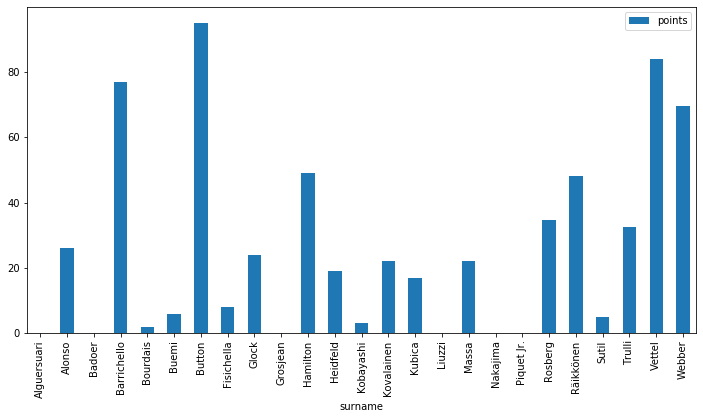

In [98]:
plt.figure(figsize=(12,6))
points_2009.plot(kind='bar',figsize=(12,6))

In [112]:
#pivot table for all races

pts_2009=new2_2009.pivot_table(values='points',index='circuit_name',columns='surname')

pts_2009.fillna(0,inplace=True)
pts_2009.head()

surname,Alguersuari,Alonso,Badoer,Barrichello,Bourdais,Buemi,Button,Fisichella,Glock,Grosjean,...,Liuzzi,Massa,Nakajima,Piquet Jr.,Rosberg,Räikkönen,Sutil,Trulli,Vettel,Webber
circuit_name,,,,,,,,,,,,,,,,,,,,,
Abu Dhabi Grand Prix,0.0,0.0,0.0,5.0,0.0,1.0,6.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,10.0,8.0
Australian Grand Prix,0.0,4.0,0.0,8.0,1.0,2.0,10.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,6.0,0.0,0.0
Bahrain Grand Prix,0.0,1.0,0.0,4.0,0.0,0.0,10.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,6.0,8.0,0.0
Belgian Grand Prix,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,10.0,0.0,0.0,6.0,0.0
Brazilian Grand Prix,0.0,0.0,0.0,1.0,0.0,2.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,5.0,10.0


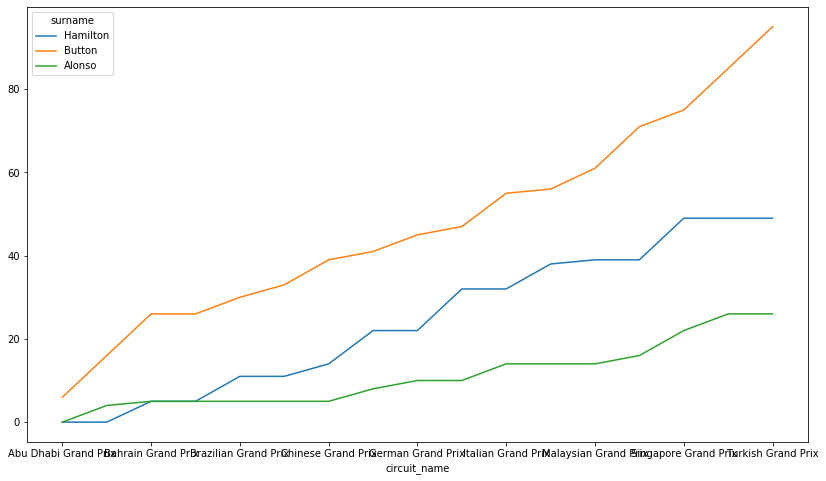

In [118]:
pts_2009[['Hamilton','Button','Alonso']].cumsum().plot(figsize=(14,8))

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 <a list of 11 Text xticklabel objects>)

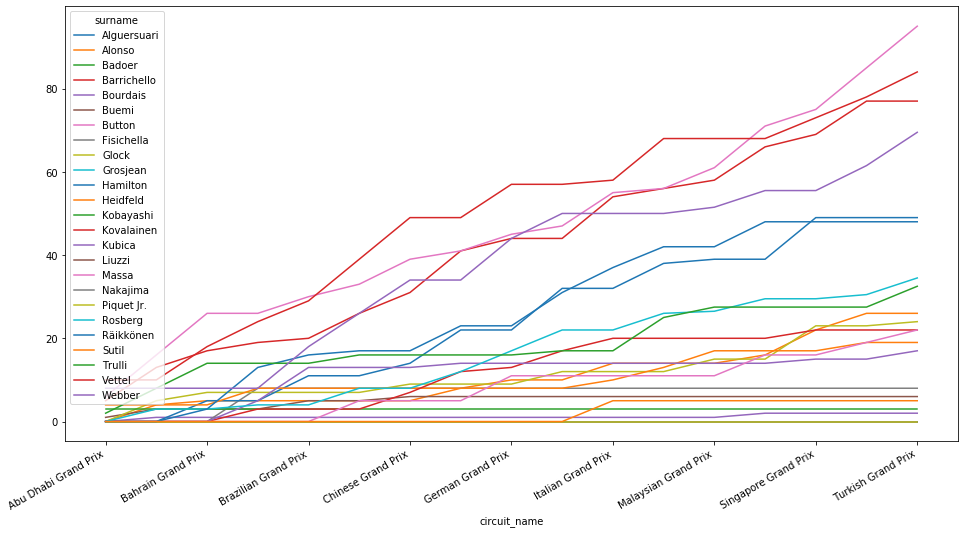

In [124]:
#plotting th epoints as races progress (cummulative sum graph)

pts_2009.cumsum().plot(figsize=(16,8))
plt.xticks(rotation=30,ha='right')

## Taking all data

In [125]:
new2.head()

,statusId,status,driverId,code,surname,nationality,raceId,year,round,circuitId,...,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed
0,1,Finished,1,HAM,Hamilton,British,2,2009,2,2,...,7,7,1.0,31,+1:00.733,4312825,17,11,1:39.141,201.276
1,1,Finished,1,HAM,Hamilton,British,3,2009,3,17,...,6,6,3.0,56,+1:11.866,7135351,39,12,1:54.665,171.138
2,1,Finished,1,HAM,Hamilton,British,4,2009,4,3,...,4,4,5.0,57,+22.096,5530278,13,6,1:34.915,205.269
3,1,Finished,1,HAM,Hamilton,British,7,2009,7,5,...,13,13,0.0,58,+1:20.454,5265302,53,15,1:28.562,216.986
4,1,Finished,1,HAM,Hamilton,British,10,2009,10,11,...,1,1,10.0,70,1:38:23.876,5903876,16,4,1:22.479,191.219


In [128]:
new3=new2[['surname','code','nationality','year','points','circuit_name']]
new3.head()

,surname,code,nationality,year,points,circuit_name
0,Hamilton,HAM,British,2009,1.0,Malaysian Grand Prix
1,Hamilton,HAM,British,2009,3.0,Chinese Grand Prix
2,Hamilton,HAM,British,2009,5.0,Bahrain Grand Prix
3,Hamilton,HAM,British,2009,0.0,Turkish Grand Prix
4,Hamilton,HAM,British,2009,10.0,Hungarian Grand Prix


In [133]:
#calculating all the points by all drivers in all years

final_points=new3.groupby('surname')['points'].sum().reset_index()
final_points.set_index('surname',inplace=True)
final_points.tail()

,points
surname,
van der Vyver,0.0
von Opel,0.0
von Stuck,0.0
von Trips,56.0
Étancelin,3.0


In [138]:
filt=final_points['points']>200
important_drivers=final_points[filt]
important_drivers.head()

,points
surname,
Alesi,241.0
Alonso,1919.0
Barrichello,658.0
Berger,385.0
Bottas,1604.0


In [141]:
important_drivers

,points
surname,
Alesi,241.00
Alonso,1919.00
Barrichello,658.00
Berger,385.00
Bottas,1604.00
Brabham,261.00
Button,1235.00
Clark,274.00
Coulthard,535.00


In [173]:
num_of_races=new3.groupby('surname')['points'].count().reset_index()
num_of_races.set_index('surname',inplace=True)
num_of_races['num_of_races']=num_of_races['points']
num_of_races.drop('points',inplace=True,axis=1)
num_of_races.head()


,num_of_races
surname,
Abate,2
Abecassis,2
Acheson,9
Adams,2
Ader,1


In [174]:
new4=pd.merge(num_of_races,important_drivers,left_index=True,right_index=True)
new4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alesi to Webber
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_of_races  51 non-null     int64  
 1   points        51 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.2+ KB


In [175]:
#change the datatype of points to int
new4['num_of_races']=new4['num_of_races'].astype(float)
new4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alesi to Webber
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_of_races  51 non-null     float64
 1   points        51 non-null     float64
dtypes: float64(2)
memory usage: 1.2+ KB


In [176]:
#consider the average points by important drivers

new4['avg_points']=new4['points']/new4['num_of_races']
new4.head()

,num_of_races,points,avg_points
surname,,,
Alesi,202.0,241.0,1.193069
Alonso,323.0,1919.0,5.941176
Barrichello,326.0,658.0,2.018405
Berger,212.0,385.0,1.816038
Bottas,166.0,1604.0,9.662651


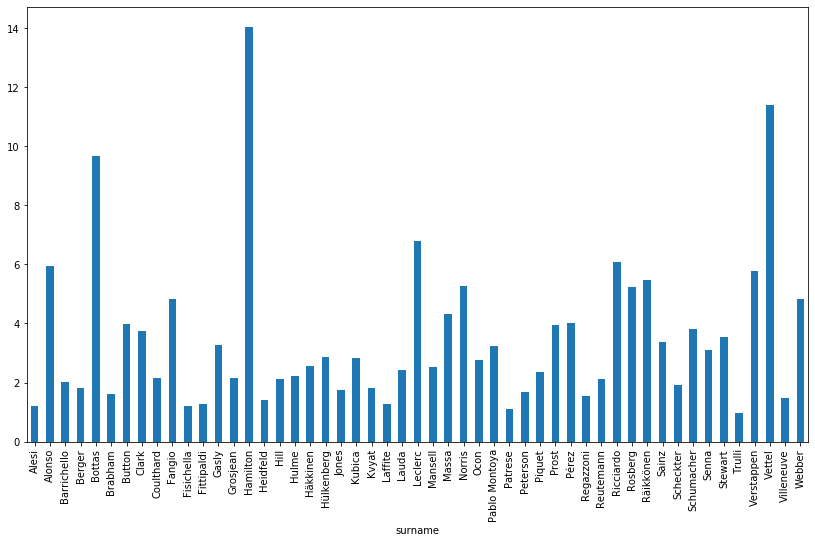

In [179]:
new4['avg_points'].plot(kind='bar',figsize=(14,8))

In [180]:
#It is clear that Hamilton and Vettel are way above their peers in average points accumulated per race